In [ ]:
# @title Welcome

from IPython.display import HTML

HTML('''
<div style="padding: 20px; background: linear-gradient(90deg, #a64ac9, #ff66b2); color: white; text-align: center; border-radius: 10px; font-size: 28px; font-weight: bold;">
  iAAA: Mathematics for Machine Learning
</div>
''')

### 📝 Notebook Topic: *Correlation Analysis & Regression*  
👨‍🏫 Lecturer: *Hadi Asheri*  
📅 Date: *[YYYY-MM-DD]*  

---

<h1 style='text-align: right;'>
مثال تحلیل همبستگی
</h1>

In [ ]:
# @title Section 1: Correlation Analysis
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 1: Correlation Analysis
</div>
''')

First few rows of the dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


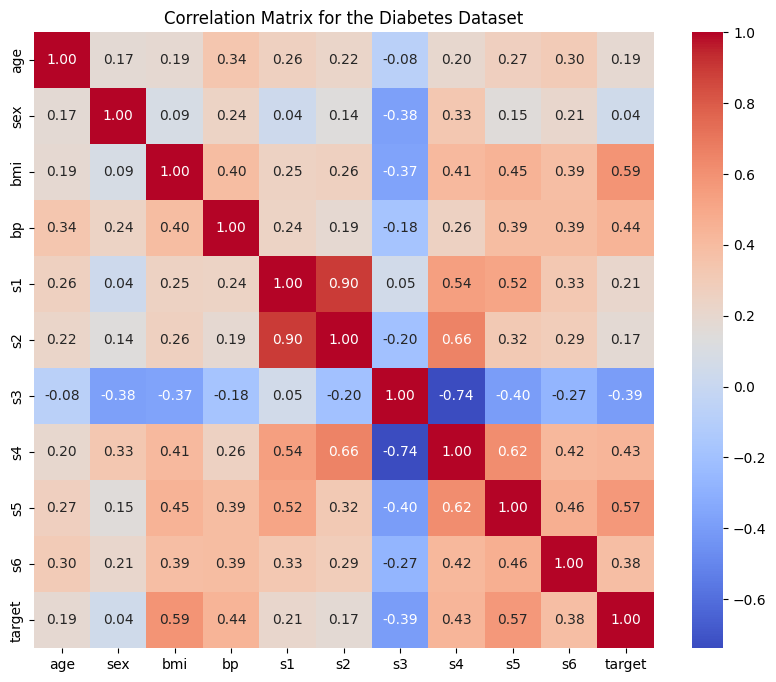

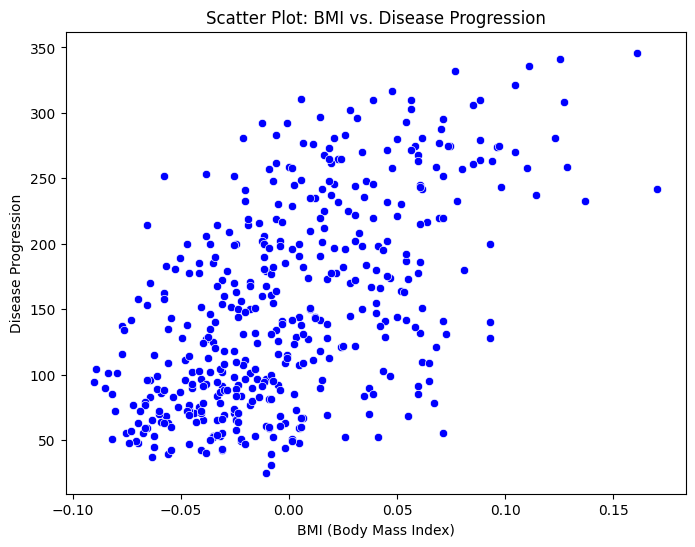

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# Load the diabetes dataset (contains 10 baseline variables and a target variable related to disease progression)
diabetes_data = load_diabetes()

# Create a DataFrame with feature names and add the target variable
df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
df['target'] = diabetes_data.target

# Display the first few rows to understand the dataset
print("First few rows of the dataset:")
print(df.head())

# Compute the correlation matrix (default is Pearson correlation)
corr_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for the Diabetes Dataset")
plt.show()

# ----------------------------------------------------
# Scatter Plot Example:
# Let's visualize the correlation between BMI ('bmi') and the disease progression ('target').
# The BMI is one of the features and it can show a moderate relation with the target.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='target', data=df, color='blue')
plt.title("Scatter Plot: BMI vs. Disease Progression")
plt.xlabel("BMI (Body Mass Index)")
plt.ylabel("Disease Progression")
plt.show()


<h1 style='text-align: right;'>
رگرسیون خطی</h1>

In [ ]:
# @title Section 2: Linear Regression
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 2: Linear Regression
</div>
''')

First few rows of the dataset:
   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


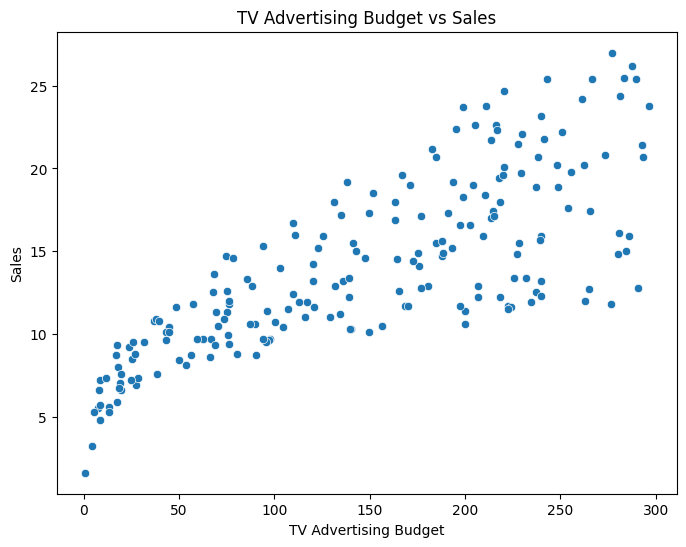

Simple Linear Regression Model:
Coefficient (TV slope): 0.047
Intercept: 7.120
R² Score on test data: 0.677
Mean Squared Error on test data: 10.205


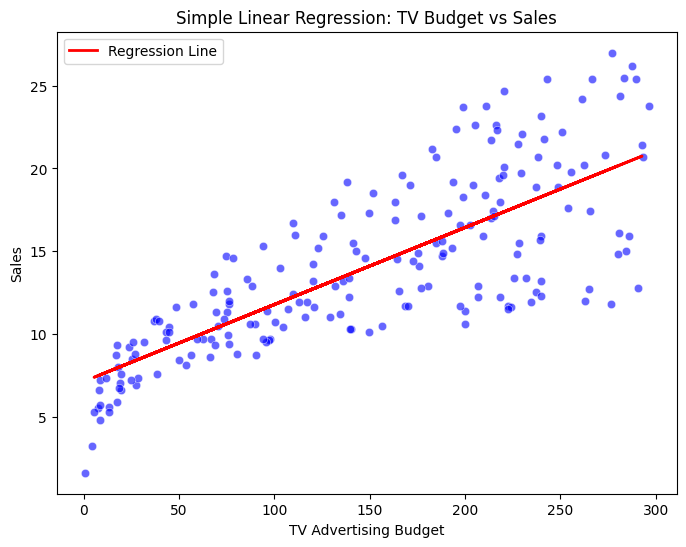


Multiple Linear Regression Model:
Coefficient for TV: 0.046
Coefficient for radio: 0.189
Coefficient for newspaper: -0.001
Intercept: 2.939
R² Score (on full dataset): 0.897


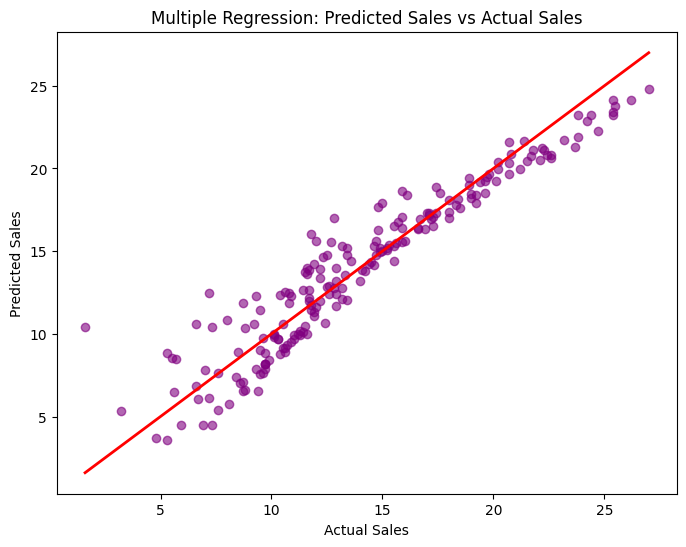

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the Advertising dataset from an updated URL
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url)

# Display the first few rows to understand the dataset structure
print("First few rows of the dataset:")
print(df.head())

# ==============================
# SIMPLE LINEAR REGRESSION
# Using TV advertising to predict Sales
# ==============================

# Scatter plot: TV advertising budget vs Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x="TV", y="sales", data=df)
plt.title("TV Advertising Budget vs Sales")
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.show()

# Prepare the data
X = df[["TV"]]   # Predictor: TV advertising spend
y = df["sales"]  # Response: Sales

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict sales for the test set
y_pred = model.predict(X_test)

# Output the model's parameters and performance metrics
print("Simple Linear Regression Model:")
print(f"Coefficient (TV slope): {model.coef_[0]:.3f}")
print(f"Intercept: {model.intercept_:.3f}")
print(f"R² Score on test data: {r2_score(y_test, y_pred):.3f}")
print(f"Mean Squared Error on test data: {mean_squared_error(y_test, y_pred):.3f}")

# Plot the regression line over the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="TV", y="sales", data=df, color='blue', alpha=0.6)
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.title("Simple Linear Regression: TV Budget vs Sales")
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.legend()
plt.show()

# ==============================
# MULTIPLE LINEAR REGRESSION
# Using TV, Radio, and Newspaper advertising budgets to predict Sales
# ==============================

features = ["TV", "radio", "newspaper"]
X_all = df[features]
y_all = df["sales"]

# Create and train the multiple linear regression model
model_all = LinearRegression()
model_all.fit(X_all, y_all)

# Output the coefficients and intercept for the multiple regression model
print("\nMultiple Linear Regression Model:")
for i, feature in enumerate(features):
    print(f"Coefficient for {feature}: {model_all.coef_[i]:.3f}")
print(f"Intercept: {model_all.intercept_:.3f}")
print(f"R² Score (on full dataset): {model_all.score(X_all, y_all):.3f}")

# Visualize predictions vs. actual Sales for the multiple regression model
y_all_pred = model_all.predict(X_all)
plt.figure(figsize=(8, 6))
plt.scatter(y_all, y_all_pred, color='purple', alpha=0.6)
plt.plot([y_all.min(), y_all.max()], [y_all.min(), y_all.max()], color='red', lw=2)
plt.title("Multiple Regression: Predicted Sales vs Actual Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()


In [ ]:
# @title Section 3: Correlation Vs. Causality
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 3: Correlation Vs. Causality
</div>
''')

<h1 style='text-align: right;'>
تمایز همبستگی و علیت
</h1>
<h3 style='text-align: right;'>
در این مثال، ما یک متغیر مخدوش‌کننده (دما) را شبیه‌سازی می‌کنیم که هم بر فروش بستنی و هم بر حوادث غرق شدن تأثیر می‌گذارد. اگرچه فروش بستنی و حوادث غرق شدن همبستگی معناداری را نشان می‌دهند، اما هیچ ارتباط علی مستقیمی بین آنها وجود ندارد - هر دو توسط دما هدایت می‌شوند.

Correlation between ice cream sales and drowning incidents: 0.3166444284646035


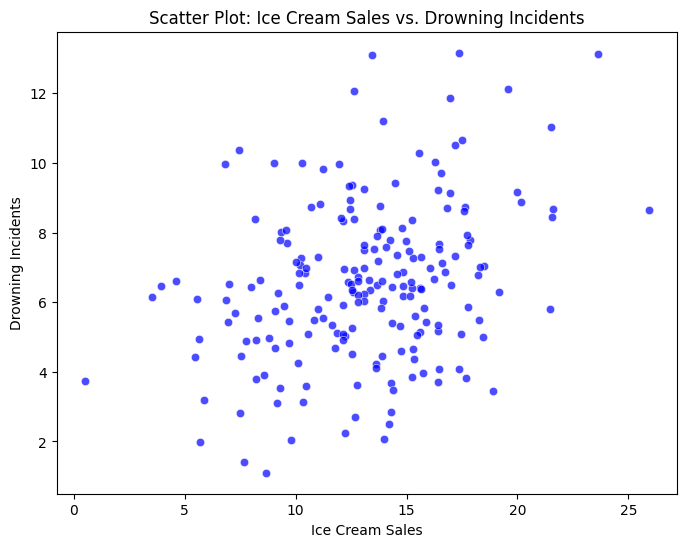


Simple Regression (Ice Cream Sales --> Drowning Incidents):
                            OLS Regression Results                            
Dep. Variable:     drowning_incidents   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     22.06
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           4.92e-06
Time:                        12:36:24   Log-Likelihood:                -436.77
No. Observations:                 200   AIC:                             877.5
Df Residuals:                     198   BIC:                             884.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

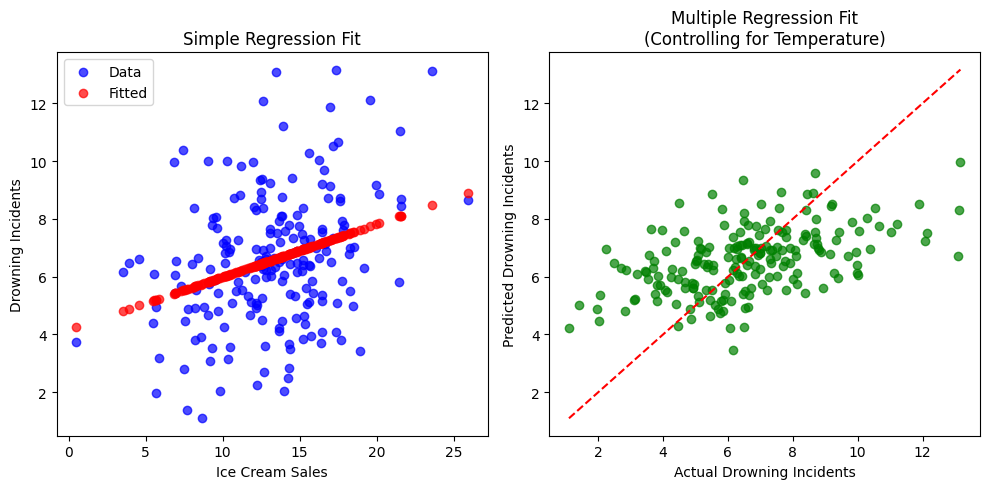

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(42)
n = 200  # number of data observations

# Simulate the confounding variable: Temperature
# Higher temperature increases both ice cream sales and the likelihood of drowning incidents.
temperature = np.random.normal(loc=6, scale=5, size=n)

# Simulate ice cream sales as a function of temperature plus noise.
# (A higher temperature leads to increased ice cream sales.)
ice_cream_sales = 10 + 0.5 * temperature + np.random.normal(loc=0, scale=3, size=n)

# Simulate drowning incidents as a function of temperature plus noise.
# (High temperature increases swimming activity, leading to more drowning incidents.)
# Note: There is no direct influence of ice cream sales on drowning incidents!
drowning_incidents = 5 + 0.3 * temperature + np.random.normal(loc=0, scale=2, size=n)

# Create a DataFrame to hold the data
df = pd.DataFrame({
    'temperature': temperature,
    'ice_cream_sales': ice_cream_sales,
    'drowning_incidents': drowning_incidents
})

# -----------------------------
# Step 1: Visualize the raw data and compute correlation
# -----------------------------
corr = df['ice_cream_sales'].corr(df['drowning_incidents'])
print("Correlation between ice cream sales and drowning incidents:", corr)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='ice_cream_sales', y='drowning_incidents', data=df, color='blue', alpha=0.7)
plt.title("Scatter Plot: Ice Cream Sales vs. Drowning Incidents")
plt.xlabel("Ice Cream Sales")
plt.ylabel("Drowning Incidents")
plt.savefig("scatter.png")

plt.show()

# Interpretation:
# Even though there is a statistically significant correlation between ice cream sales and drowning incidents,
# this does not mean that ice cream sales cause drowning—instead, both are affected by the temperature.

# -----------------------------
# Step 2: Simple Linear Regression (without controlling for temperature)
# -----------------------------
# Predict drowning incidents using only ice cream sales.
X_simple = sm.add_constant(df['ice_cream_sales'])
model_simple = sm.OLS(df['drowning_incidents'], X_simple).fit()
print("\nSimple Regression (Ice Cream Sales --> Drowning Incidents):")
print(model_simple.summary())

# -----------------------------
# Step 3: Multiple Regression (controlling for temperature)
# -----------------------------
# Now, include temperature as a predictor.
X_multi = df[['ice_cream_sales', 'temperature']]
X_multi = sm.add_constant(X_multi)
model_multi = sm.OLS(df['drowning_incidents'], X_multi).fit()
print("\nMultiple Regression (Ice Cream Sales and Temperature --> Drowning Incidents):")
print(model_multi.summary())

# -----------------------------
# Visualization of the difference:
# Plot fitted values from both models versus the actual drowning incidents.
# -----------------------------
plt.figure(figsize=(10, 5))

# Plot for simple regression model predictions
plt.subplot(1, 2, 1)
plt.scatter(df['ice_cream_sales'], df['drowning_incidents'], alpha=0.7, label='Data', color='blue')
plt.scatter(df['ice_cream_sales'], model_simple.fittedvalues, marker='o', color='red', label='Fitted', alpha=0.7)
plt.title("Simple Regression Fit")
plt.xlabel("Ice Cream Sales")
plt.ylabel("Drowning Incidents")
plt.legend()

# Plot for multiple regression model predictions (we use temperature's effect as well)
plt.subplot(1, 2, 2)
plt.scatter(df['drowning_incidents'], model_multi.fittedvalues, alpha=0.7, color='green')
plt.title("Multiple Regression Fit\n(Controlling for Temperature)")
plt.xlabel("Actual Drowning Incidents")
plt.ylabel("Predicted Drowning Incidents")
plt.plot([df['drowning_incidents'].min(), df['drowning_incidents'].max()],
         [df['drowning_incidents'].min(), df['drowning_incidents'].max()],
         'r--')
plt.tight_layout()
plt.show()


<h1 style='text-align: right;'>
ضریب همبستگی پیرسون
</h1>


In [ ]:
# @title Section 4: Pearson Correlation
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 4: Pearson Correlation
</div>
''')

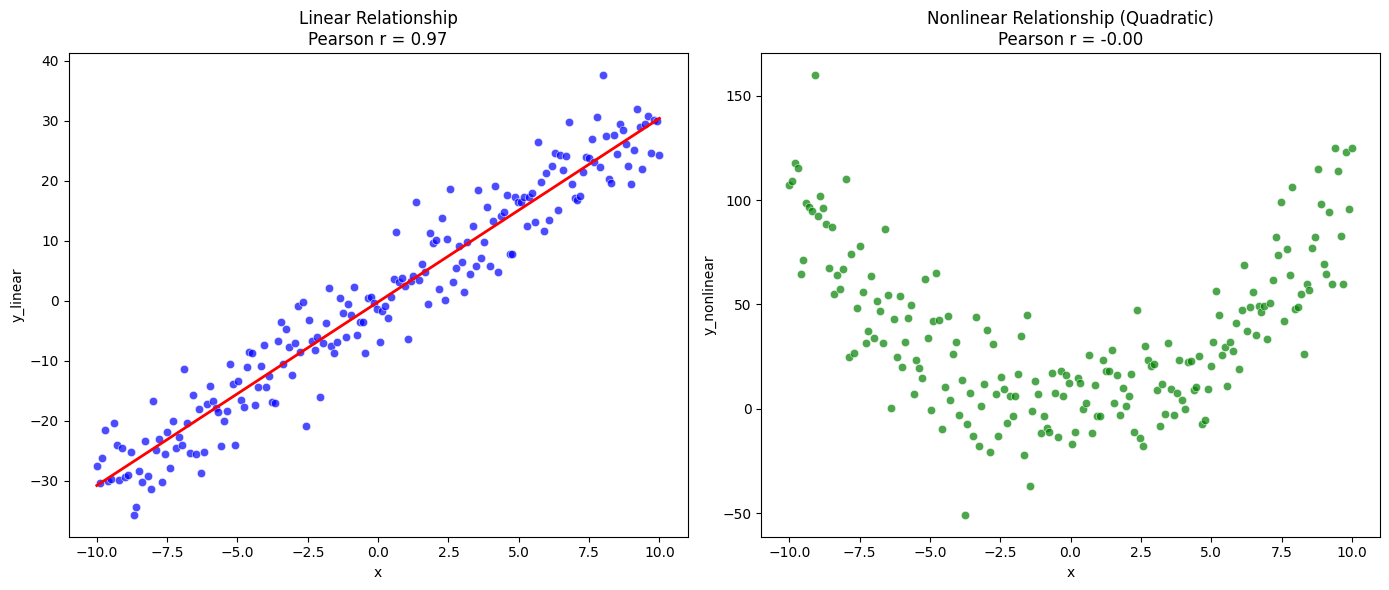

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Set a random seed for reproducibility
np.random.seed(42)

# Generate data
n = 200
x = np.linspace(-10, 10, n)

# Linear relationship: y = 3*x + noise
noise_linear = np.random.normal(0, 5, n)
y_linear = 3 * x + noise_linear

# Nonlinear relationship: y = x^2 + noise
noise_nonlinear = np.random.normal(0, 20, n)
y_nonlinear = x**2 + noise_nonlinear

# Calculate Pearson correlation for both relationships
corr_linear, _ = pearsonr(x, y_linear)
corr_nonlinear, _ = pearsonr(x, y_nonlinear)

# Create subplots for visualization
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot linear relationship
sns.scatterplot(x=x, y=y_linear, ax=axs[0], color="blue", alpha=0.7)
axs[0].set_title(f"Linear Relationship\nPearson r = {corr_linear:.2f}")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y_linear")
# Optionally add a regression line to emphasize the linear trend
m, b = np.polyfit(x, y_linear, 1)
axs[0].plot(x, m*x + b, color="red", lw=2)

# Plot nonlinear relationship
sns.scatterplot(x=x, y=y_nonlinear, ax=axs[1], color="green", alpha=0.7)
axs[1].set_title(f"Nonlinear Relationship (Quadratic)\nPearson r = {corr_nonlinear:.2f}")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y_nonlinear")

plt.tight_layout()
plt.show()


<h1 style='text-align: right;'>
ضریب همبستگی برای داده پرت/غیرنرمال
</h1>


In [ ]:
# @title Section 5: Correlation for Outliers
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 5: Correlation for Outliers
</div>
''')

Pearson correlation: 0.98 with p = 0.0
Spearman correlation: 0.85 with p = 0.0


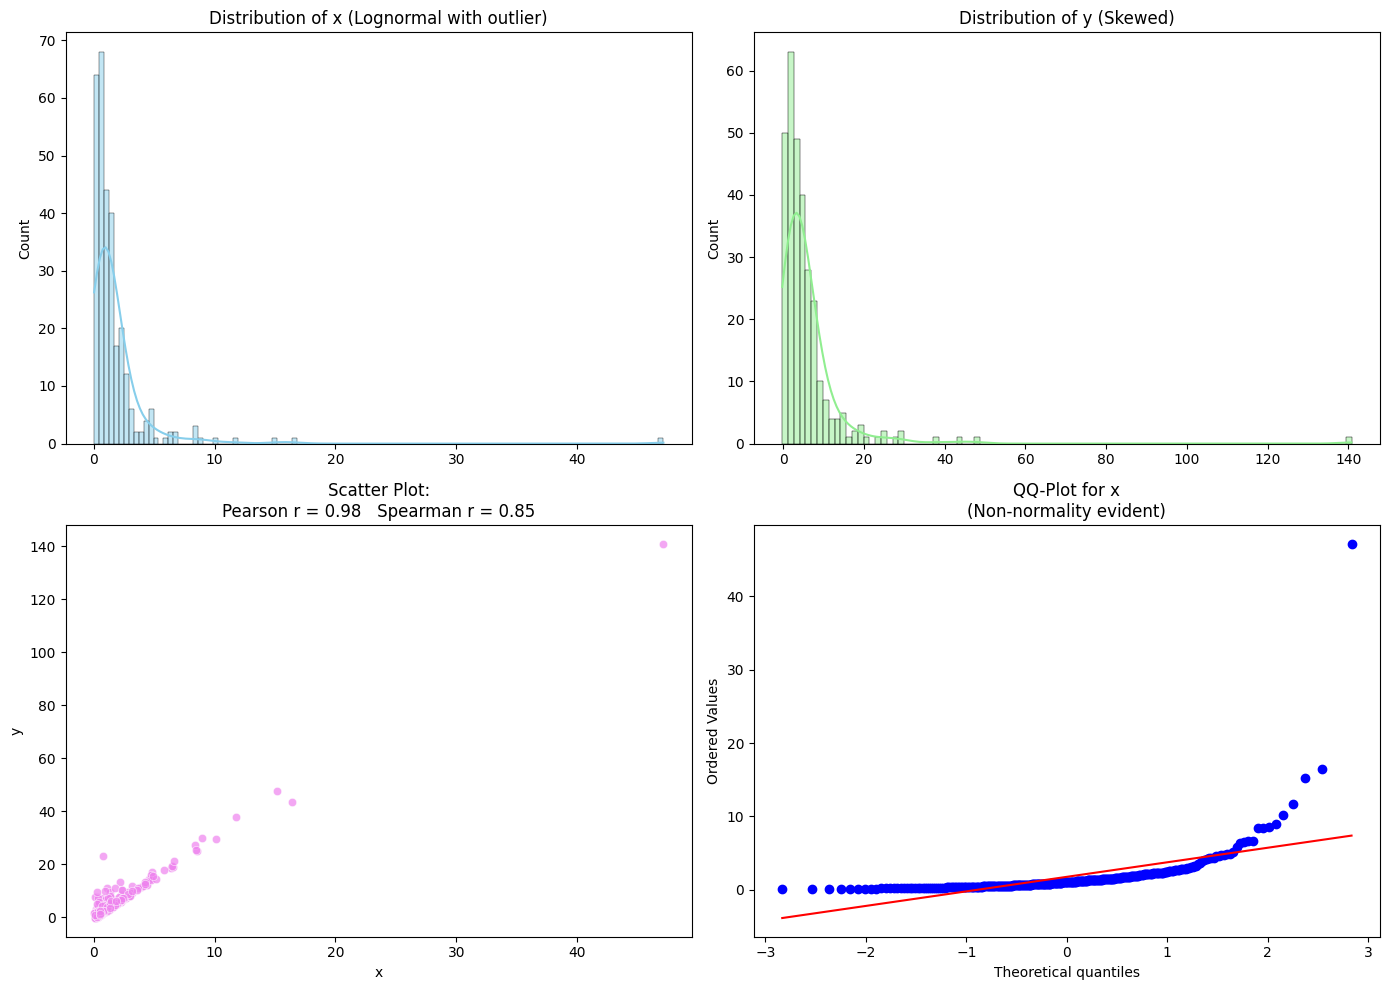

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, probplot

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n = 300

# Generate a skewed variable 'x' from a log-normal distribution (which is non-normal)
x = np.random.lognormal(mean=0, sigma=1, size=n)

# Generate 'y' as approximately linear in x, but noise is also generated from a lognormal distribution
# (so both variables are skewed)
noise = np.random.lognormal(mean=0, sigma=1, size=n) - np.exp(0)  # Center the noise loosely around 0
y = 3 * x + noise

# Introduce an extreme outlier in both x and y
x[0] = x[0] * 10
y[0] = y[0] * 10

# Compute Pearson correlation
pearson_corr, pearson_p = pearsonr(x, y)

# Compute Spearman correlation (rank-based, more robust for non-normal data)
spearman_corr, spearman_p = spearmanr(x, y)

print("Pearson correlation:", round(pearson_corr, 2), "with p =", round(pearson_p, 4))
print("Spearman correlation:", round(spearman_corr, 2), "with p =", round(spearman_p, 4))

# Visualization

# Create subplots for histograms, scatter plot, and a QQ-plot to assess normality.
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot the distribution of x (skewed, non-normal)
sns.histplot(x, kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title("Distribution of x (Lognormal with outlier)")

# Plot the distribution of y (skewed, non-normal)
sns.histplot(y, kde=True, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title("Distribution of y (Skewed)")

# Scatter plot of x vs y, showing the effect of the outlier
sns.scatterplot(x=x, y=y, ax=axs[1, 0], color='violet', alpha=0.7)
axs[1, 0].set_title(f"Scatter Plot:\nPearson r = {pearson_corr:.2f}   Spearman r = {spearman_corr:.2f}")
axs[1, 0].set_xlabel("x")
axs[1, 0].set_ylabel("y")

# QQ-plot for x to assess normality (it will deviate from the straight line)
probplot(x, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title("QQ-Plot for x\n(Non-normality evident)")

plt.tight_layout()
plt.show()


<h1 style='text-align: right;'>
ضریب همبستگی اسپیرمن
</h1>

In [ ]:
# @title Section 6: Spearman Correlation Coefficient
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 6: Spearman Correlation Coefficient
</div>
''')

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
Spearman's correlation: 0.679 (p-value = 0.000)
Pearson's correlation:  0.676 (p-value = 0.000)


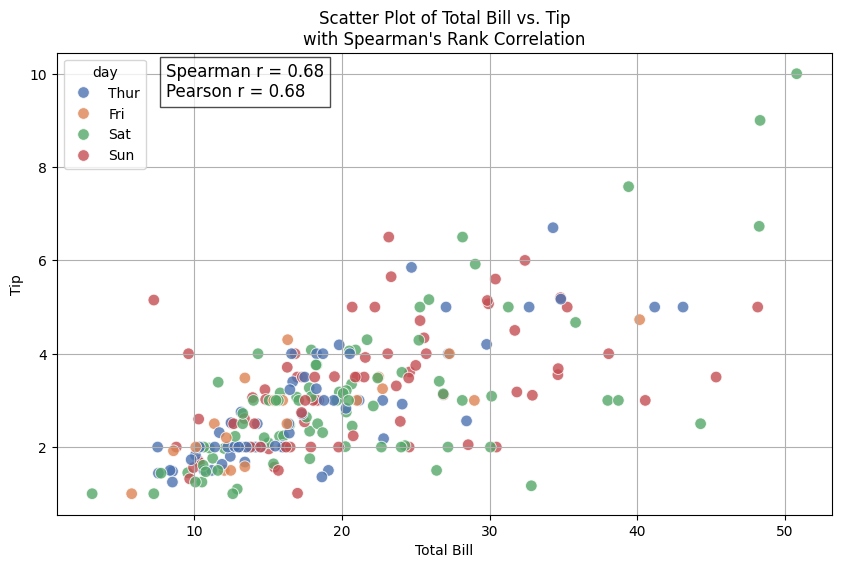

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr, pearsonr

# Load the real "tips" dataset from Seaborn
tips = sns.load_dataset("tips")

# Display the first few rows of the dataset
print(tips.head())

# Choose two variables: total_bill and tip
x = tips['total_bill']
y = tips['tip']

# Compute Spearman's rank correlation coefficient
spearman_corr, spearman_p = spearmanr(x, y)

# Also compute Pearson's correlation for comparison
pearson_corr, pearson_p = pearsonr(x, y)

print(f"Spearman's correlation: {spearman_corr:.3f} (p-value = {spearman_p:.3f})")
print(f"Pearson's correlation:  {pearson_corr:.3f} (p-value = {pearson_p:.3f})")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, hue=tips['day'], palette="deep", s=70, alpha=0.8)

# Annotate the plot with the correlation coefficients
plt.text(np.min(x) + 5, np.max(y) - 0.5,
         f"Spearman r = {spearman_corr:.2f}\nPearson r = {pearson_corr:.2f}",
         bbox=dict(facecolor='white', alpha=0.7), fontsize=12)

plt.title("Scatter Plot of Total Bill vs. Tip\nwith Spearman's Rank Correlation")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.grid(True)
plt.show()


<h1 style='text-align: right;'>
 همبستگی منفی
</h1>

In [ ]:
# @title Section 7: Negative Correlation
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 7: Negative Correlation
</div>
''')

Spearman's correlation: -0.854 (p-value = 0.000)
Pearson's correlation:  -0.778 (p-value = 0.000)


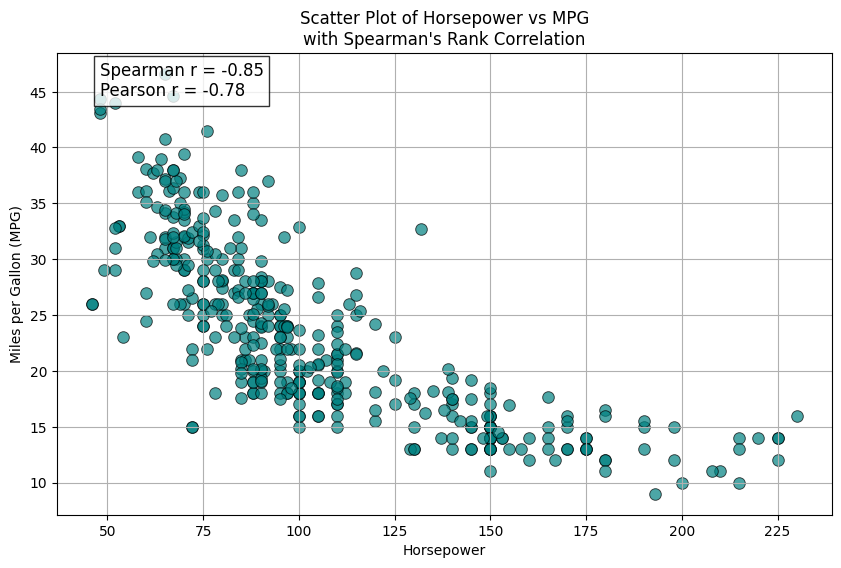

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr, pearsonr

# Load the "mpg" dataset and drop rows with missing values
mpg_data = sns.load_dataset("mpg").dropna()

# Select the two continuous variables for analysis:
# horsepower: Engine power
# mpg: Fuel efficiency (miles per gallon)
x = mpg_data['horsepower']
y = mpg_data['mpg']

# Compute Spearman's rank correlation coefficient
spearman_corr, spearman_p = spearmanr(x, y)

# Also compute Pearson's correlation coefficient for comparison
pearson_corr, pearson_p = pearsonr(x, y)

# Print the correlation results
print(f"Spearman's correlation: {spearman_corr:.3f} (p-value = {spearman_p:.3f})")
print(f"Pearson's correlation:  {pearson_corr:.3f} (p-value = {pearson_p:.3f})")

# Create a scatter plot to visualize the relationship between horsepower and mpg
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, color='teal', alpha=0.7, s=70, edgecolor='k')

# Annotate the plot with the correlation coefficients
plt.text(np.min(x) + 2, np.max(y) - 2,
         f"Spearman r = {spearman_corr:.2f}\nPearson r = {pearson_corr:.2f}",
         bbox=dict(facecolor='white', alpha=0.8), fontsize=12)

plt.xlabel("Horsepower")
plt.ylabel("Miles per Gallon (MPG)")
plt.title("Scatter Plot of Horsepower vs MPG\nwith Spearman's Rank Correlation")
plt.grid(True)
plt.show()


<h1 style='text-align: right;'>
اثر غیرخطی بودن داده
</h1>

In [ ]:
# @title Section 8: The Effect of Non-Linearity
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 8: The Effect of Non-Linearity
</div>
''')

Pearson correlation:  0.695 (p = 0.000)
Spearman correlation: 1.000 (p = 0.000)


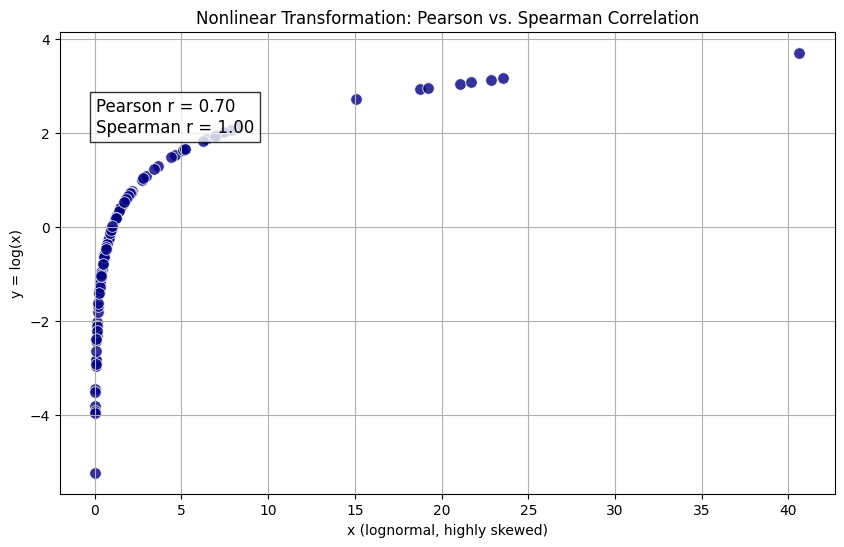

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Set random seed for reproducibility
np.random.seed(42)

# Generate a highly skewed variable from a lognormal distribution.
# Here we choose sigma=2 to induce a wide spread and extreme nonlinearity.
n = 100
x = np.random.lognormal(mean=0, sigma=2, size=n)

# Define y as the logarithm of x.
# Since log(x) is a strictly increasing transformation, the rank ordering of x and y is identical.
y = np.log(x)

# Compute Pearson's correlation coefficient (measures linear association)
pearson_corr, pearson_p = pearsonr(x, y)

# Compute Spearman's rank correlation coefficient (measures monotonic association)
spearman_corr, spearman_p = spearmanr(x, y)

print(f"Pearson correlation:  {pearson_corr:.3f} (p = {pearson_p:.3f})")
print(f"Spearman correlation: {spearman_corr:.3f} (p = {spearman_p:.3f})")

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, s=70, color='navy', alpha=0.8, edgecolor='w')

# Annotate the plot with both correlation coefficients.
plt.text(np.percentile(x, 10), np.percentile(y, 90),
         f"Pearson r = {pearson_corr:.2f}\nSpearman r = {spearman_corr:.2f}",
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.xlabel("x (lognormal, highly skewed)")
plt.ylabel("y = log(x)")
plt.title("Nonlinear Transformation: Pearson vs. Spearman Correlation")
plt.xscale('linear')  # We display x in its original (skewed) scale.
plt.grid(True)
plt.show()


<h1 style='text-align: right;'>
ضریب کندال تاو
</h1>

In [ ]:
# @title Section 9: Kendall-Tau Coefficient
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 9: Kendall-Tau Coefficient
</div>
''')

Kendall's tau correlation: 0.834 (p-value = 0.000)
Pearson's correlation:  0.922 (p-value = 0.000)
Spearman's correlation: 0.963 (p-value = 0.000)


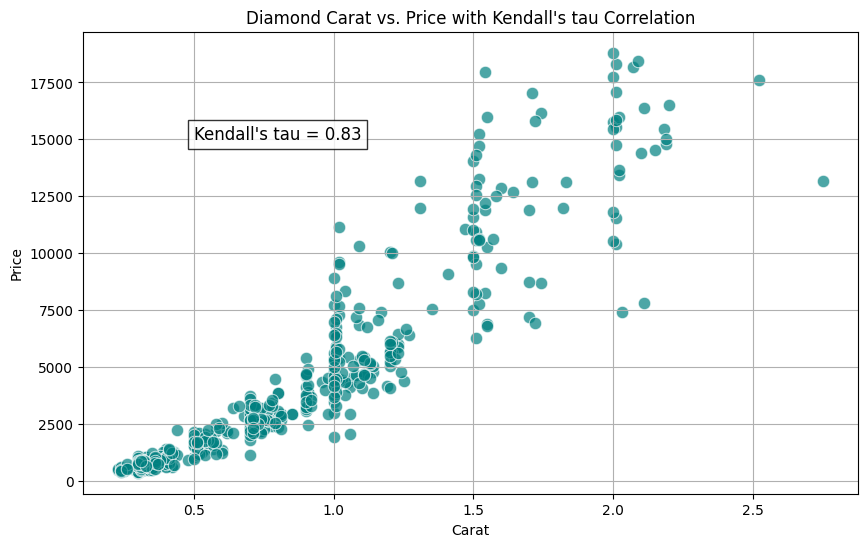

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau, pearsonr, spearmanr

# -------------------------------
# Load and prepare the dataset
# -------------------------------
# Load the "diamonds" dataset (a real dataset provided by Seaborn)
diamonds = sns.load_dataset("diamonds")

# Drop any missing values (if present)
diamonds.dropna(inplace=True)

# For visualization purposes, sample 500 points from the dataset
sampled_data = diamonds.sample(n=500, random_state=42)

# Select the two numeric variables: "carat" and "price"
x = diamonds['carat']
y = diamonds['price']

# -------------------------------
# Compute correlation coefficients
# -------------------------------
# Calculate Kendall's tau correlation coefficient (nonparametric, rank-based)
kendall_corr, kendall_p = kendalltau(x, y)

# For comparison, calculate Pearson's and Spearman's correlation coefficients
pearson_corr, pearson_p = pearsonr(x, y)
spearman_corr, spearman_p = spearmanr(x, y)

# Print correlation results
print(f"Kendall's tau correlation: {kendall_corr:.3f} (p-value = {kendall_p:.3f})")
print(f"Pearson's correlation:  {pearson_corr:.3f} (p-value = {pearson_p:.3f})")
print(f"Spearman's correlation: {spearman_corr:.3f} (p-value = {spearman_p:.3f})")

# -------------------------------
# Visualization: Scatter Plot
# -------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_data, x='carat', y='price',
                color='teal', alpha=0.7, edgecolor='w', s=80)

# Annotate the scatter plot with Kendall's tau correlation result
plt.text(0.5, 15000, f"Kendall's tau = {kendall_corr:.2f}",
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamond Carat vs. Price with Kendall's tau Correlation")
plt.grid(True)
plt.show()


<h1 style='text-align: right;'>
اثر داده پرت
</h1>

In [ ]:
# @title Section 10: Outlier Effect
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 10: Outlier Effect
</div>
''')

Original Data:
 Pearson:  0.99, Spearman: 0.99, Kendall tau: 0.95
Data with Outlier:
 Pearson:  0.77, Spearman: 0.97, Kendall tau: 0.91


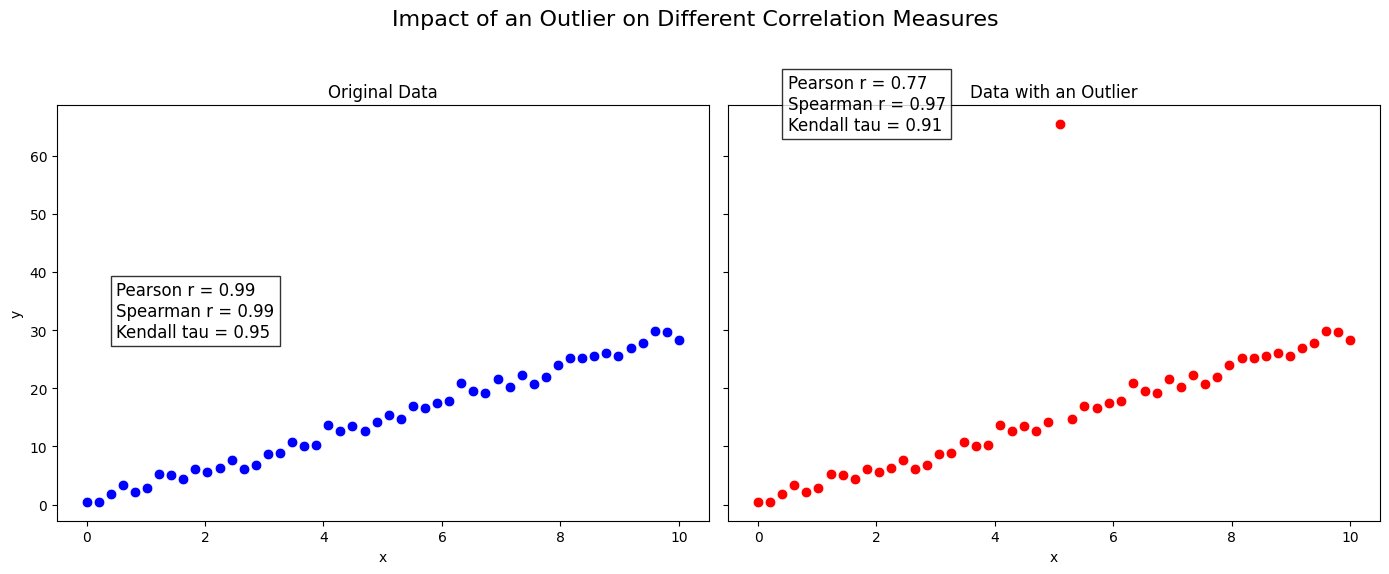

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau

# Set random seed for reproducibility
np.random.seed(42)

# -------------------------------
# Generate the base dataset (clean data)
# -------------------------------
n = 50
x = np.linspace(0, 10, n)
# Define y as roughly linear with some noise: y = 3*x + noise
y = 3 * x + np.random.normal(0, 1, n)

# Compute correlation coefficients for the original data
pearson_original, _ = pearsonr(x, y)
spearman_original, _ = spearmanr(x, y)
kendall_original, _ = kendalltau(x, y)

# -------------------------------
# Introduce an extreme outlier into the data
# -------------------------------
# Create a copy of y and add a large positive value at one index
y_out = y.copy()
# Choose an index (e.g., index 25) and add a large positive offset (e.g., 50)
y_out[25] += 50

# Compute correlation coefficients for the data with the outlier
pearson_out, _ = pearsonr(x, y_out)
spearman_out, _ = spearmanr(x, y_out)
kendall_out, _ = kendalltau(x, y_out)

# Print the correlation coefficients for comparison
print("Original Data:")
print(f" Pearson:  {pearson_original:.2f}, Spearman: {spearman_original:.2f}, Kendall tau: {kendall_original:.2f}")
print("Data with Outlier:")
print(f" Pearson:  {pearson_out:.2f}, Spearman: {spearman_out:.2f}, Kendall tau: {kendall_out:.2f}")

# -------------------------------
# Visualization
# -------------------------------
# Create two subplots side by side: left - original data, right - data with outlier
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Scatter plot for original data
sns.scatterplot(x=x, y=y, ax=axs[0], color="blue", s=60, edgecolor="w")
axs[0].set_title("Original Data")
axs[0].text(0.5, np.max(y)-1,
            f"Pearson r = {pearson_original:.2f}\nSpearman r = {spearman_original:.2f}\nKendall tau = {kendall_original:.2f}",
            fontsize=12, bbox=dict(facecolor="white", alpha=0.8))
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

# Scatter plot for data with an outlier
sns.scatterplot(x=x, y=y_out, ax=axs[1], color="red", s=60, edgecolor="w")
axs[1].set_title("Data with an Outlier")
axs[1].text(0.5, np.max(y_out)-1,
            f"Pearson r = {pearson_out:.2f}\nSpearman r = {spearman_out:.2f}\nKendall tau = {kendall_out:.2f}",
            fontsize=12, bbox=dict(facecolor="white", alpha=0.8))
axs[1].set_xlabel("x")

plt.suptitle("Impact of an Outlier on Different Correlation Measures", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<h1 style='text-align: right;'>
اثر اضافه کردن نویز بر روی ضریب تعیین
</h1>


In [ ]:
# @title Section 11: Effect of Noise
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 11: Effect of Noise
</div>
''')

    Number of Noise Predictors  R-squared  Adjusted R-squared
0                            0   0.761089            0.758651
1                            1   0.761118            0.756192
2                            2   0.769885            0.762694
3                            3   0.770629            0.760971
4                            4   0.768076            0.755740
5                            5   0.773781            0.759186
6                            6   0.784941            0.768578
7                            7   0.769945            0.749721
8                            8   0.773898            0.751287
9                            9   0.783641            0.759331
10                          10   0.783314            0.756228


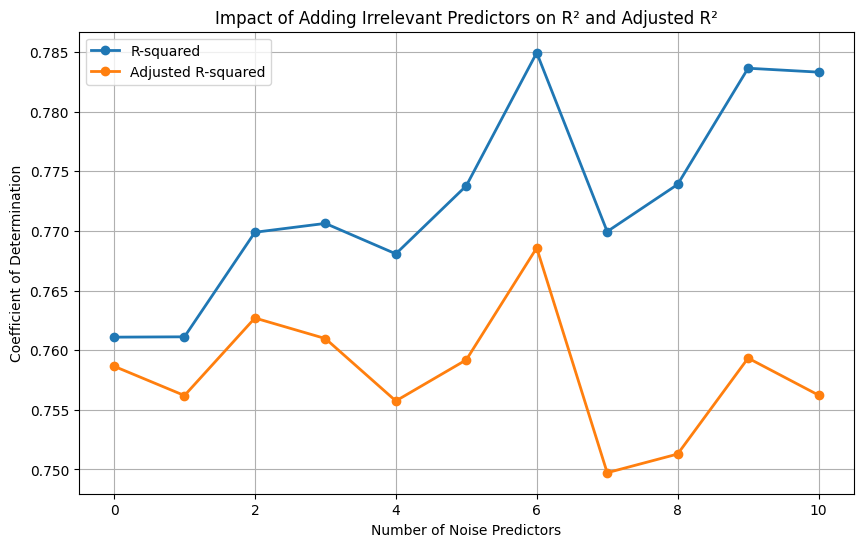

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set the random seed for reproducibility
np.random.seed(42)

# Number of observations
n = 100

# Generate the true predictor and response:
# x_true is the only predictor that is actually related to y.
x_true = np.random.normal(0, 1, n)
epsilon = np.random.normal(0, 1, n)
y = 2 * x_true + epsilon  # true relationship: y = 2*x_true + noise

# We'll add a varying number (from 0 to 10) of noise predictors that have no relationship with y.
max_noise = 10
results = []

for k in range(0, max_noise + 1):
    # Create a DataFrame with the true predictor
    df = pd.DataFrame({'x_true': x_true})

    # Add k noise predictors
    for j in range(1, k + 1):
        df[f'noise_{j}'] = np.random.normal(0, 1, n)

    # Add a constant term for intercept
    X = sm.add_constant(df)

    # Fit the regression model (OLS)
    model = sm.OLS(y, X).fit()

    # Save the number of noise predictors, R-squared and Adjusted R-squared
    results.append((k, model.rsquared, model.rsquared_adj))

# Create a DataFrame to store the results for easy plotting
df_results = pd.DataFrame(results, columns=["Number of Noise Predictors", "R-squared", "Adjusted R-squared"])
print(df_results)

# Plot R-squared and Adjusted R-squared as we add more noise predictors
plt.figure(figsize=(10, 6))
plt.plot(df_results["Number of Noise Predictors"], df_results["R-squared"], marker='o', label="R-squared", linewidth=2)
plt.plot(df_results["Number of Noise Predictors"], df_results["Adjusted R-squared"], marker='o', label="Adjusted R-squared", linewidth=2)
plt.xlabel("Number of Noise Predictors")
plt.ylabel("Coefficient of Determination")
plt.title("Impact of Adding Irrelevant Predictors on R² and Adjusted R²")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# @title Section 12: Linear Regression Tests
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 12: Linear Regression Tests
</div>
''')

<h1 style='text-align: right;'>
آزمون‌های معناداری ضرایب رگرسیون خطی
</h1>
<h3 style='text-align: right;'>
در زیر یک نمونه کد پایتون آورده شده است که نحوه انجام آزمون t آماری روی ضرایب یک مدل رگرسیون خطی با استفاده از داده‌های شبیه‌سازی شده را نشان می‌دهد. این کد یک مدل حداقل مربعات معمولی را با کتابخانه statsmodels برازش می‌دهد، خلاصه‌ای دقیق (که شامل ضرایب، خطاهای استاندارد، آماره‌های t و مقادیر p است) چاپ می‌کند و سپس ضرایب تخمین زده شده را به همراه فواصل اطمینان 95٪ آنها تجسم می‌کند. آزمون t برای هر ضریب، بررسی می‌کند که آیا آن ضریب تفاوت معناداری با صفر دارد یا خیر.</h3>

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     312.2
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           3.14e-32
Time:                        12:36:35   Log-Likelihood:                -135.71
No. Observations:                 100   AIC:                             275.4
Df Residuals:                      98   BIC:                             280.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0074      0.096     10.540      0.0

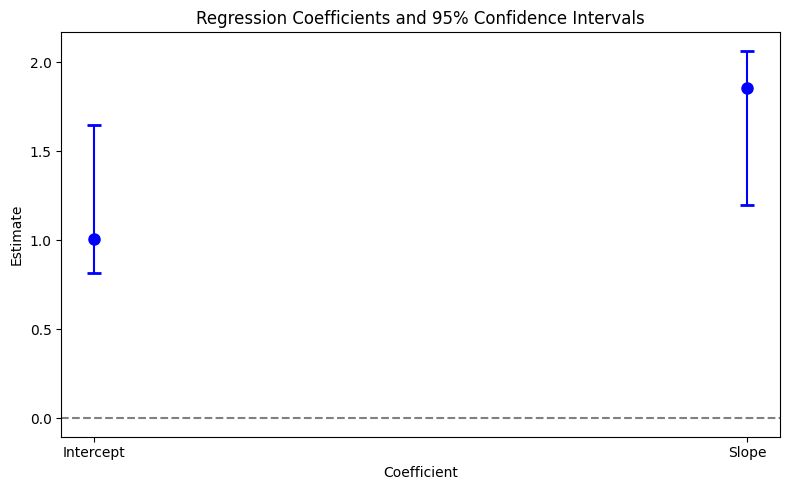

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Simulate data
np.random.seed(42)
n = 100
# Generate independent variable X from a standard normal distribution
X = np.random.normal(loc=0, scale=1, size=n)
# True model: y = intercept + slope * X + error, where error ~ N(0,1)
true_intercept = 1.0
true_slope = 2.0
error = np.random.normal(loc=0, scale=1, size=n)
y = true_intercept + true_slope * X + error

# 2. Prepare the design matrix (adding an intercept term)
X_design = sm.add_constant(X)  # This adds a column of ones for the intercept

# 3. Fit the linear regression model using Ordinary Least Squares (OLS)
model = sm.OLS(y, X_design).fit()

# Print the detailed regression summary.
# The summary displays the estimated coefficients, standard errors,
# t-statistics, and p-values for the hypothesis test (H0: coefficient == 0).
print(model.summary())

# 4. Extract coefficients, their 95% confidence intervals, and t-statistics
# coefs = model.params
coefs = pd.Series(model.params, index=['Intercept', 'Slope'])
conf_int = model.conf_int(alpha=0.05)  # 95% Confidence Intervals (lower and upper bounds)
t_stats = model.tvalues  # t-statistics (coef / standard error)

print("Estimated Coefficients:\n", coefs)
print("\n95% Confidence Intervals:\n", conf_int)
print("\nT-statistics:\n", t_stats)

# Explanation:
# The t-test for each coefficient tests the null hypothesis H0: β = 0 against
# the alternative H1: β ≠ 0. A high absolute t-value (or a small p-value)
# indicates that the coefficient is statistically significantly different from zero.

# 5. Visualization: Plot coefficients with their 95% confidence intervals
fig, ax = plt.subplots(figsize=(8, 5))

# Compute error bars: difference between coefficients and lower/upper bounds of confidence intervals.
error_lower = coefs - conf_int[0]
error_upper = conf_int[1] - coefs

# Create an errorbar plot to visualize the coefficient estimates and their uncertainties.
ax.errorbar(coefs.index, coefs, yerr=[error_lower, error_upper],
            fmt='o', capsize=5, capthick=2, color='b', markersize=8)
ax.axhline(0, color='gray', linestyle='--')  # A horizontal line at y=0 for reference.
ax.set_title('Regression Coefficients and 95% Confidence Intervals')
ax.set_xlabel('Coefficient')
ax.set_ylabel('Estimate')
plt.tight_layout()
plt.show()

# Final Note:
# If the 95% confidence interval for a coefficient does not include 0,
# it implies that the coefficient is statistically significant (p-value < 0.05).
# The printed summary from statsmodels confirms the result of the t-test for each coefficient.


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           9.11e-12
Time:                        12:36:36   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2273      1.599     23.285      0.0

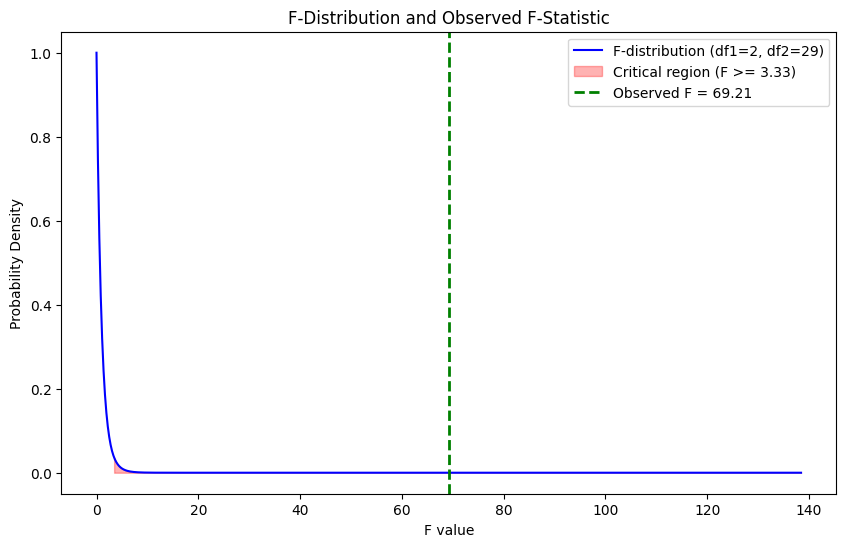

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import f

# -------------------------------
# 1. Load a real dataset (mtcars)
# -------------------------------
# The mtcars dataset is built-in to the R 'datasets' package.
# We load it using statsmodels' get_rdataset utility:
mtcars_data = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data

# -------------------------------
# 2. Prepare the data and fit the model
# -------------------------------
# We'll predict 'mpg' (miles per gallon) using 'wt' (weight) and 'hp' (horsepower).

# Define the predictors and dependent variable
X = mtcars_data[['wt', 'hp']]
y = mtcars_data['mpg']

# Add a constant term to capture the intercept term.
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) model.
model = sm.OLS(y, X).fit()

# Print the regression summary, which includes the F-test among other statistics.
print(model.summary())

# -------------------------------
# 3. Extract F-test results
# -------------------------------
# The overall F-test in regression evaluates the null hypothesis:
# H0: β1 = β2 = ... = βk = 0   (none of the predictors have a significant linear relationship with y)
#
# In our model:
F_value = model.fvalue         # The observed F-statistic.
df1 = int(model.df_model)      # Degrees of freedom in the numerator (number of predictors, k = 2 here).
df2 = int(model.df_resid)      # Degrees of freedom in the denominator (n - k - 1).
F_pvalue = model.f_pvalue      # The corresponding p-value for the overall F-test.

print(f"F-statistic: {F_value:.2f}")
print(f"Degrees of freedom (numerator): {df1}")
print(f"Degrees of freedom (denom.): {df2}")
print(f"F-test p-value: {F_pvalue:.4f}")

# -------------------------------
# 4. Visualize the F-test result
# -------------------------------
# We'll plot the probability density function (pdf) of the F-distribution with df1 and df2.
# We then mark:
#  - The critical region for a significance level of alpha (commonly set at 0.05).
#  - A vertical line corresponding to the observed F statistic.

# Define the significance level (alpha).
alpha = 0.05
# Calculate the critical value using the quantile function of the F-distribution.
F_critical = f.ppf(1 - alpha, df1, df2)

# Define an array of x values covering the range up to a bit more than the observed F.
x_vals = np.linspace(0, F_value * 2, 1000)
f_pdf = f.pdf(x_vals, df1, df2)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_pdf, 'b-', label=f'F-distribution (df1={df1}, df2={df2})')
plt.xlabel('F value')
plt.ylabel('Probability Density')
plt.title('F-Distribution and Observed F-Statistic')

# Shade the critical region (where x >= F_critical)
plt.fill_between(x_vals, f_pdf, where=(x_vals >= F_critical), color='red', alpha=0.3,
                 label=f'Critical region (F >= {F_critical:.2f})')

# Mark the observed F statistic with a vertical dashed line.
plt.axvline(F_value, color='green', linestyle='--', linewidth=2,
            label=f'Observed F = {F_value:.2f}')

plt.legend()
plt.show()


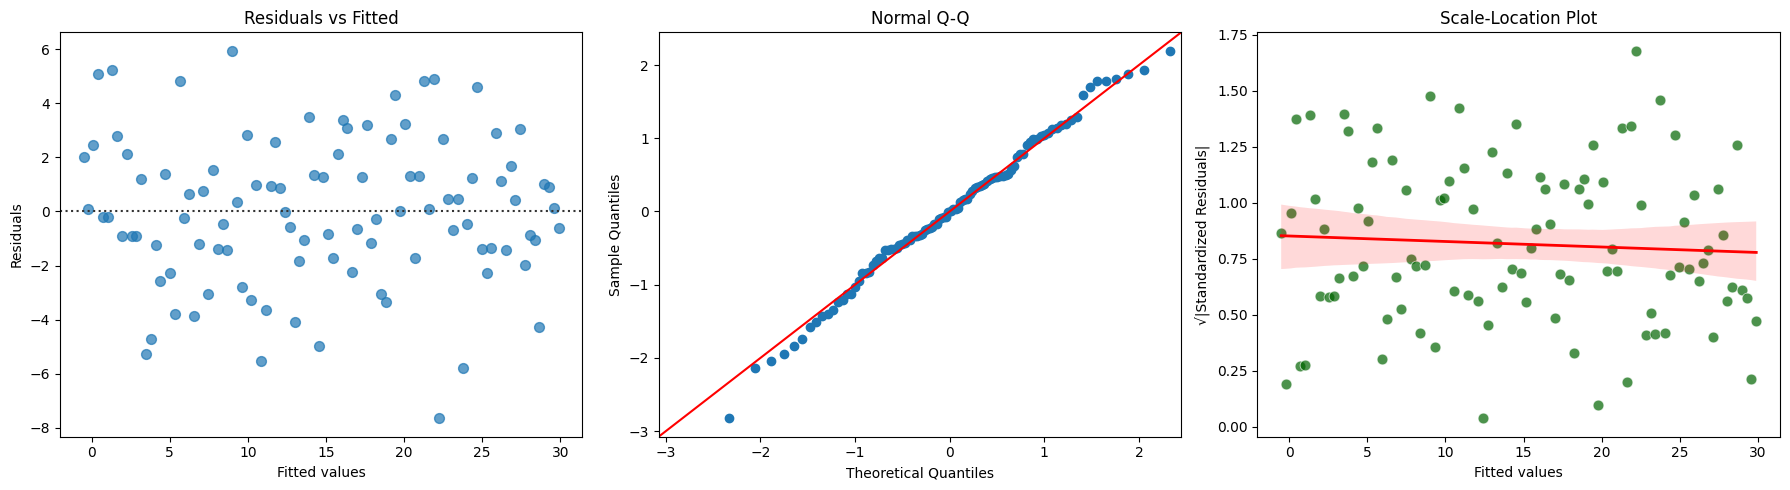

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1051.
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           3.48e-54
Time:                        12:36:37   Log-Likelihood:                -241.52
No. Observations:                 100   AIC:                             487.0
Df Residuals:                      98   BIC:                             492.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5184      0.543     -0.955      0.3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# -------------------------------
# 1. Generate simulated data
# -------------------------------
np.random.seed(42)
n = 100
# Create an evenly spaced predictor variable
x = np.linspace(0, 10, n)
# Define the true relationship with some added noise
y = 3 * x + np.random.normal(scale=3, size=n)

# Build a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# -------------------------------
# 2. Fit a linear regression model
# -------------------------------
X = sm.add_constant(df['x'])      # add an intercept term
model = sm.OLS(df['y'], X).fit()    # fit the model

# Add fitted values and residuals to the DataFrame
df['fitted'] = model.fittedvalues
df['residuals'] = model.resid

# Obtain standardized (studentized) residuals for the scale-location plot
influence = model.get_influence()
standardized_resid = influence.resid_studentized_internal
df['sqrt_abs_std_resid'] = np.sqrt(np.abs(standardized_resid))

# -------------------------------
# 3. Create Residual Analysis Plots
# -------------------------------

# Set up a 1x3 grid for the plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ----- Plot 1: Residuals vs Fitted -----
sns.residplot(x=df['fitted'], y=df['residuals'], lowess=False,
              ax=axes[0], scatter_kws={'alpha': 0.7, 's': 50}, line_kws={'color': 'red', 'lw': 2})
axes[0].set_title("Residuals vs Fitted")
axes[0].set_xlabel("Fitted values")
axes[0].set_ylabel("Residuals")

# ----- Plot 2: Q-Q Plot -----
sm.qqplot(df['residuals'], line='45', fit=True, ax=axes[1])
axes[1].set_title("Normal Q-Q")

# ----- Plot 3: Scale-Location Plot -----
sns.scatterplot(x=df['fitted'], y=df['sqrt_abs_std_resid'],
                ax=axes[2], color='darkgreen', s=60, alpha=0.7)
sns.regplot(x=df['fitted'], y=df['sqrt_abs_std_resid'],
            scatter=False, lowess=False, ax=axes[2],
            line_kws={'color': 'red', 'lw': 2})
axes[2].set_title("Scale-Location Plot")
axes[2].set_xlabel("Fitted values")
axes[2].set_ylabel("√|Standardized Residuals|")

plt.tight_layout()
plt.show()

# Optionally, print the summary of the regression model for further details
print(model.summary())


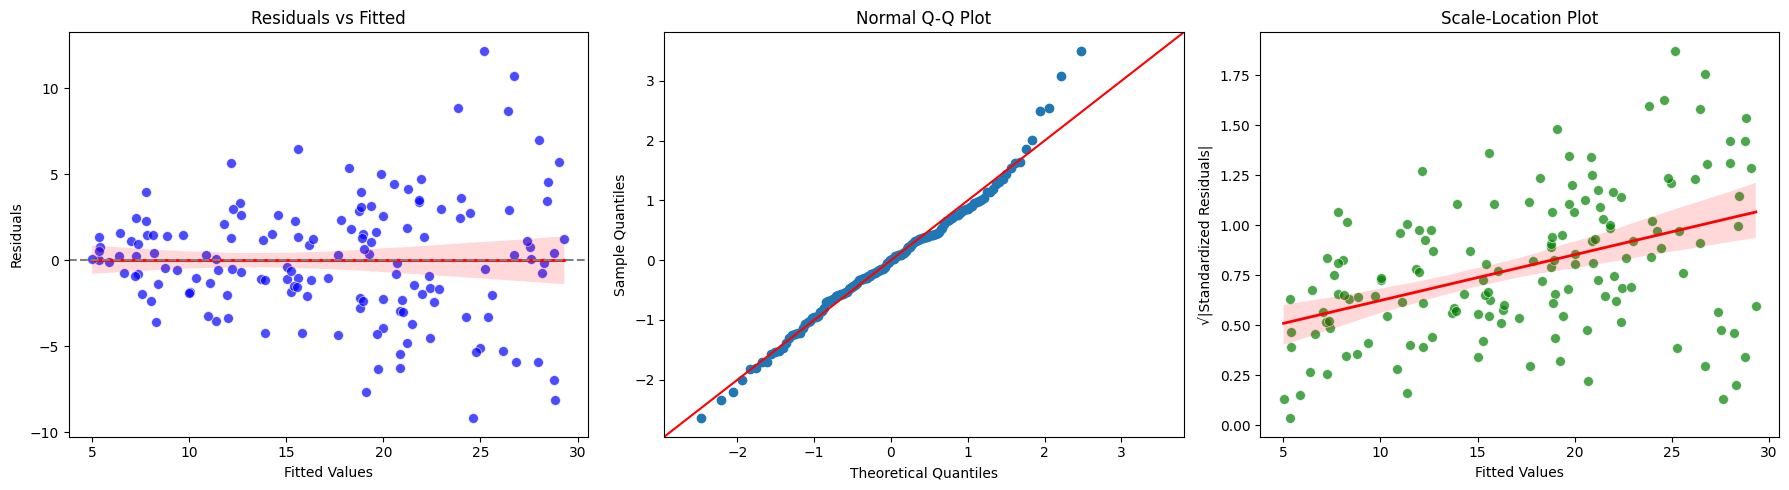

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     572.7
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           9.77e-53
Time:                        12:36:39   Log-Likelihood:                -399.71
No. Observations:                 150   AIC:                             803.4
Df Residuals:                     148   BIC:                             809.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8983      0.594      8.240      0.0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.nonparametric.smoothers_lowess import lowess

# ---------------------------------------------------
# 1. Generate simulated data with heteroscedastic errors
# ---------------------------------------------------
np.random.seed(0)
n = 150
# Predictor x from a uniform distribution.
x = np.random.uniform(0, 10, n)

# Introduce heteroscedastic errors:
# The standard deviation of the error increases with x.
error = np.random.normal(0, 1 + 0.5 * x, size=n)

# True relationship: y = 5 + 2.5 * x, plus error.
y = 5 + 2.5 * x + error

# Create a DataFrame with the data.
data = pd.DataFrame({'x': x, 'y': y})

# ---------------------------------------------------
# 2. Fit a linear regression model (y ~ x)
# ---------------------------------------------------
# Add a constant term (intercept)
X = sm.add_constant(data['x'])
model = sm.OLS(data['y'], X).fit()

# Add fitted values and residuals to the DataFrame.
data['fitted'] = model.fittedvalues
data['residuals'] = model.resid

# Obtain standardized (studentized) residuals for the scale-location plot.
# These residuals account for the leverage of each observation.
influence = model.get_influence()
std_resid = influence.resid_studentized_internal
data['sqrt_abs_std_resid'] = np.sqrt(np.abs(std_resid))

# ---------------------------------------------------
# 3. Create Residual Analysis Plots
# ---------------------------------------------------
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# ----- Plot 1: Residuals vs. Fitted Plot -----
sns.scatterplot(x=data['fitted'], y=data['residuals'], ax=axs[0],
                color='blue', s=50, alpha=0.7)
# Add a LOWESS smoother to highlight any trend.
sns.regplot(x=data['fitted'], y=data['residuals'], lowess=False, ax=axs[0],
            scatter=False, line_kws={'color': 'red', 'lw': 2})
axs[0].set_title("Residuals vs Fitted")
axs[0].set_xlabel("Fitted Values")
axs[0].set_ylabel("Residuals")
axs[0].axhline(0, ls="--", color="gray")

# ----- Plot 2: Q-Q Plot of Residuals -----
# Use statsmodels' qqplot function to compare residual quantiles with normal quantiles.
sm.qqplot(data['residuals'], line='45', fit=True, ax=axs[1])
axs[1].set_title("Normal Q-Q Plot")

# ----- Plot 3: Scale-Location Plot (Spread-Location) -----
# Plot square-root of the absolute standardized residuals vs. fitted values.
sns.scatterplot(x=data['fitted'], y=data['sqrt_abs_std_resid'], ax=axs[2],
                color='green', s=50, alpha=0.7)
sns.regplot(x=data['fitted'], y=data['sqrt_abs_std_resid'], lowess=False, ax=axs[2],
            scatter=False, line_kws={'color': 'red', 'lw': 2})
axs[2].set_title("Scale-Location Plot")
axs[2].set_xlabel("Fitted Values")
axs[2].set_ylabel("√|Standardized Residuals|")

plt.tight_layout()
plt.show()

# ---------------------------------------------------
# 4. Display Regression Summary
# ---------------------------------------------------
print(model.summary())


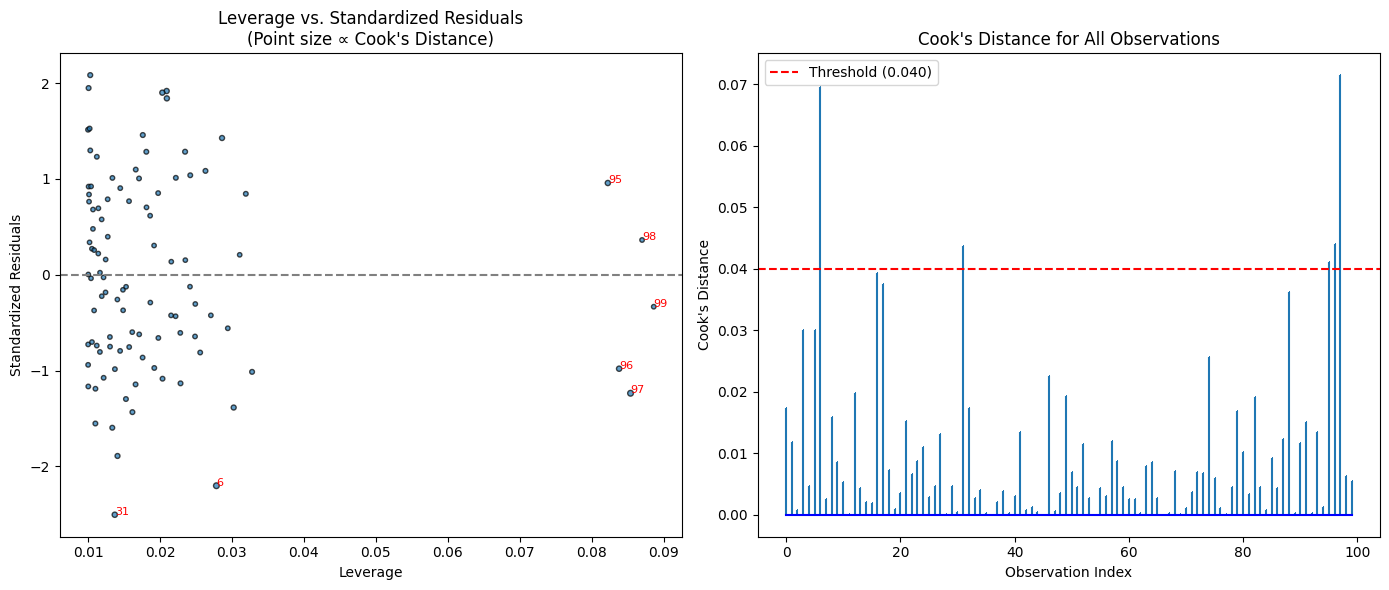

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3707.
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           1.11e-79
Time:                        12:36:40   Log-Likelihood:                -153.95
No. Observations:                 100   AIC:                             311.9
Df Residuals:                      98   BIC:                             317.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0505      0.206      0.244      0.8

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# ---------------------------------------------------
# 1. Simulate Data with a Few Influential Observations
# ---------------------------------------------------
np.random.seed(123)
n = 100
# Create a predictor x evenly spaced between 0 and 10.
x = np.linspace(0, 10, n)
# The true relationship: y = 2*x + noise.
noise = np.random.normal(0, 1, n)
y = 2 * x + noise

# Introduce a few influential observations by adding large errors to last few points.
x[95:] = x[95:] + 5    # Increase x-values for last few observations
y[95:] = y[95:] + 10   # Increase y-values for last few observations

# Build the DataFrame.
data = pd.DataFrame({'x': x, 'y': y})

# ---------------------------------------------------
# 2. Fit a Simple Linear Regression Model
# ---------------------------------------------------
# Add a constant to the predictor for the intercept.
X = sm.add_constant(data['x'])
model = sm.OLS(data['y'], X).fit()

# ---------------------------------------------------
# 3. Compute Influence Measures: Leverage and Cook's Distance
# ---------------------------------------------------
influence = model.get_influence()
# Leverage values (diagonal of the hat matrix)
leverage = influence.hat_matrix_diag
# Cook's Distance and its corresponding p-values
cooks_d, _ = influence.cooks_distance
# Standardized (studentized) residuals
standardized_resid = influence.resid_studentized_internal

# Attach the computed measures to the DataFrame
data['leverage'] = leverage
data['cooks_distance'] = cooks_d
data['standardized_resid'] = standardized_resid

# ---------------------------------------------------
# 4. Visualizations
# ---------------------------------------------------
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# ---- (a) Leverage vs. Standardized Residuals Plot ----
# Here, the size of each point is scaled by its Cook's distance.
axs[0].scatter(data['leverage'], data['standardized_resid'],
               s=100 * data['cooks_distance'] + 10,  # larger size = higher Cook's distance
               alpha=0.7, edgecolors='k')
axs[0].set_xlabel("Leverage")
axs[0].set_ylabel("Standardized Residuals")
axs[0].set_title("Leverage vs. Standardized Residuals\n(Point size ∝ Cook's Distance)")
axs[0].axhline(0, color='gray', linestyle='--')

# Threshold for high leverage can be approximated as 2*(p)/n, where p is number of predictors including constant.
p = 2  # constant + one predictor
leverage_threshold = 2 * p / n

# Annotate observations with high leverage or large Cook's distance.
for idx, row in data.iterrows():
    if row['leverage'] > leverage_threshold or row['cooks_distance'] > 4 / n:
        axs[0].annotate(int(idx), (row['leverage'], row['standardized_resid']),
                        fontsize=8, color='red')

# ---- (b) Cook's Distance Plot ----
# Create a stem plot for Cook's distance for each observation.
axs[1].stem(np.arange(len(data)), data['cooks_distance'], markerfmt=",", basefmt="b-")
axs[1].set_xlabel("Observation Index")
axs[1].set_ylabel("Cook's Distance")
axs[1].set_title("Cook's Distance for All Observations")
# A common threshold for Cook's distance is 4/n.
cooks_threshold = 4 / n
axs[1].axhline(cooks_threshold, color='red', linestyle='--',
               label=f"Threshold ({cooks_threshold:.3f})")
axs[1].legend()

plt.tight_layout()
plt.show()

# Optional: Print the regression summary for reference.
print(model.summary())


In [30]:
# @title 🎓End of Notebook – Thank You!
from IPython.display import HTML

HTML('''
<div style="margin-top: 40px; padding: 16px; background: linear-gradient(90deg, #ff66b2, #a64ac9); color: white; text-align: center; border-radius: 10px; font-size: 18px;">
  🎓 <strong>End of Notebook – Thank You!</strong>
</div>
''')